In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Load the dataset into python environment
data=pd.read_csv('car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
data.shape

(112, 2)

In [4]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [5]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [6]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


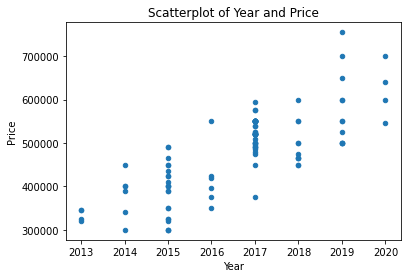

In [7]:
data.plot.scatter(x='Year', y='Price', title='Scatterplot of Year and Price');

In [8]:
print(data.corr())

           Year     Price
Year   1.000000  0.776302
Price  0.776302  1.000000


In [9]:
y = data['Price'].values.reshape(-1, 1)
x = data['Year'].values.reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


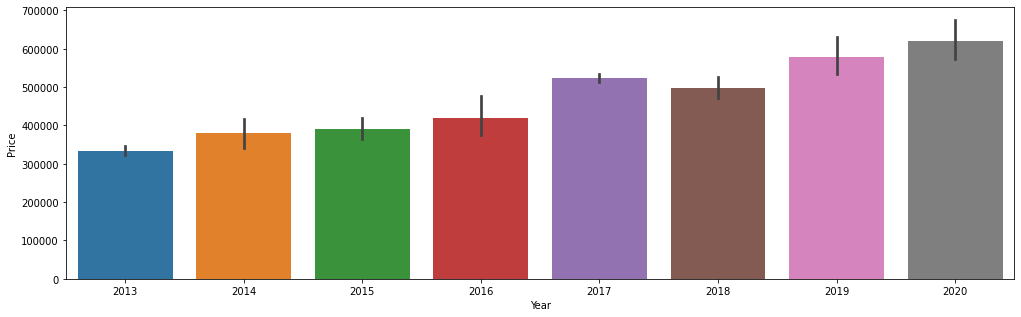

In [10]:
plt.figure(figsize=[17,5])
sns.barplot(data['Year'],data['Price'])
plt.show()

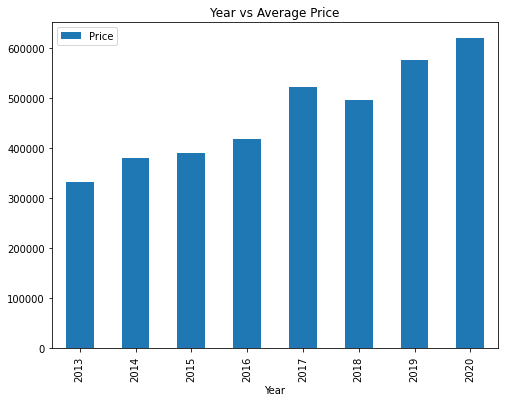

In [11]:
data = pd.DataFrame(data.groupby(['Year'])['Price'].mean())
data.plot.bar(figsize=(8,6))
plt.title('Year vs Average Price')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model1 = lr.fit(x_train, y_train)
predictions = model1.predict(x_test)

Text(0, 0.5, 'Predicted Y')

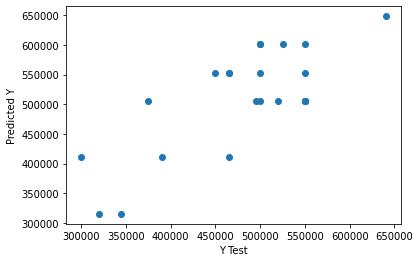

In [14]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [15]:
y_test

array([[525000],
       [495000],
       [465000],
       [450000],
       [550000],
       [300000],
       [550000],
       [500000],
       [500000],
       [550000],
       [320000],
       [550000],
       [465000],
       [640000],
       [465000],
       [500000],
       [345000],
       [390000],
       [375000],
       [520000],
       [550000],
       [500000],
       [550000]])

In [16]:
predictions

array([[600775.91252081],
       [505558.77690466],
       [553167.34471273],
       [553167.34471273],
       [553167.34471273],
       [410341.6412885 ],
       [505558.77690466],
       [553167.34471273],
       [600775.91252081],
       [600775.91252081],
       [315124.50567235],
       [505558.77690466],
       [410341.6412885 ],
       [648384.48032889],
       [553167.34471273],
       [600775.91252081],
       [315124.50567235],
       [410341.6412885 ],
       [505558.77690466],
       [505558.77690466],
       [505558.77690466],
       [505558.77690466],
       [505558.77690466]])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
print('The mean squared error is',mean_squared_error(y_test,predictions) )
print('the r squared value is', r2_score(y_test,predictions))

The mean squared error is 4326906256.829671
the r squared value is 0.36759313425902185


In [18]:
## predicting the value for 2022 model using linear regression
score = lr.predict([[2022]])
print(score)

[[743601.61594504]]


In [19]:
### LASSO REGRESSION
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
lasso.score(x_test, y_test), lasso.score(x_train, y_train)

(0.3675999284778446, 0.6389354253276789)

In [20]:
## Predicting the value of 2022 model using lasso regression
score = lasso.predict([[2022]])
print(score)

[743599.37427144]


In [21]:
print('R squared test set', round(lasso.score(x_test, y_test)*100, 2))

R squared test set 36.76


In [22]:
from sklearn.metrics import mean_squared_error
# Test data
pred = lasso.predict(x_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE test set 4326859771.02
